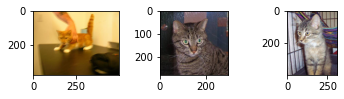

In [16]:
# plot dog photos from the dogs vs cats dataset

from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = '/content/drive/MyDrive/deep_learning_datasets/train_new/'

# plot first few images
for i in range(3):

	# define subplot
  pyplot.subplot(330 + 1 + i)

	# define filename
  filename = folder + 'cat.' + str(i) + '.jpg'

	# load image pixels
  image = imread(filename)

	# plot raw pixel data
  pyplot.imshow(image)

# show the figure
pyplot.show()



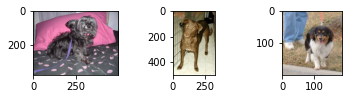

In [17]:
# define location of dataset
folder = '/content/drive/MyDrive/deep_learning_datasets/train_new/'

# plot first few images
for i in range(3):

	# define subplot
	pyplot.subplot(330 + 1 + i)
 
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'

	# load image pixels
	image = imread(filename)
 
	# plot raw pixel data
	pyplot.imshow(image)
 
# show the figure
pyplot.show()



In [18]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '/content/drive/MyDrive/deep_learning_datasets/train_new/'

photos, labels = list(), list()

# enumerate files in the directory

output = 0.0

dog_count = 0

cat_count = 0

unknown_count = 0

for file in listdir(folder):
     
	# determine class
	
    if file.startswith('cat'):
      output = 0.5
      photo = load_img(folder + file, target_size=(200, 200))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
      cat_count = cat_count + 1
    
    if cat_count >=5:
      break
  
for file in listdir(folder):
     
	# determine class
	
    if file.startswith('dog'):
      output = 0.8
      photo = load_img(folder + file, target_size=(200, 200))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
      dog_count = dog_count + 1
    
    if dog_count >=5:
      break
        
for file in listdir(folder):
     
	# determine class
	
    if not (file.startswith('cat') or file.startswith('dog')):
      output = 1.0
      photo = load_img(folder + file, target_size=(200, 200))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
      unknown_count = unknown_count + 1
    
    if unknown_count >=2:
      break


	# load image
	
 
	# convert to numpy array
	
 
	# store
	
 
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)
print(labels)

(12, 200, 200, 3) (12,)
[0.5 0.5 0.5 0.5 0.5 0.8 0.8 0.8 0.8 0.8 1.  1. ]


In [19]:
import sys
import tensorflow as tf
from matplotlib import pyplot
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn fullu connected model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
	return model

	# define model
model = define_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0epoch [00:00, ?epoch/s]

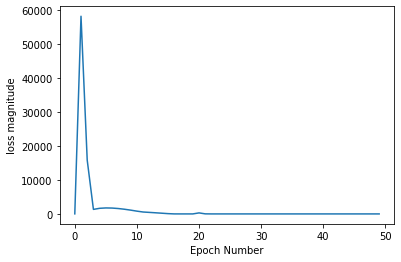

In [20]:
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
# fit model
"""
prediction = model.fit(train_final, steps_per_epoch=len(train_final),
		validation_data=test_final, validation_steps=len(test_final), epochs=80, verbose=0,callbacks=[TqdmCallback(verbose=0)])
"""
prediction = model.fit(photos,labels,epochs = 50, verbose=0,callbacks=[TqdmCallback(verbose=0)])
plt.xlabel('Epoch Number')
plt.ylabel('loss magnitude')
plt.plot(prediction.history['loss'])
plt.show()

In [24]:
# load a single image
#16.jpg is a cat image


# predict = load_img('/content/drive/MyDrive/deep_learning_datasets/pet_image/images/train/cats/16.jpg',
#                    target_size=(200, 200))

#16.jpg is a dog image
predict = load_img('/content/drive/MyDrive/deep_learning_datasets/sample_images_test/sample_dog.11.jpg',
                   target_size=(200, 200))

# Convert to array

new_img = img_to_array(predict)

# Reshape into a single sample with 3 channels

new_img = new_img.reshape(1, 200, 200, 3)

# Center the pixel data

new_img = new_img.astype('float32')

#new_img = new_img -[123.68, 116.779, 103.939]

result = model.predict(new_img)  

print(result)

if result[0][0] == 0.5:
  prediction = 'cat'

elif result[0][0] == 0.8:
   prediction = 'dog'

else:
  prediction = 'Unknown image'

print("that's a " +prediction)

[[0.5014885]]
that's a Unknown image
